In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.gfile.FastGFile讀取圖片時要用 rb

type of pic: <dtype: 'uint8'>
[[[255 255 255]
  [254 254 254]
  [253 253 251]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [253 253 253]
  [253 253 251]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [254 254 252]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[255 255 255]
  [255 255 253]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(?, ?, ?)


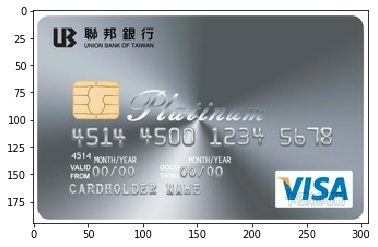

In [25]:
image_raw_data = tf.gfile.FastGFile("test.jpg",'rb').read()

with tf.Session() as sess :
    img_data = tf.image.decode_jpeg(image_raw_data)
    print("type of pic:",img_data.dtype)
    print(img_data.eval())
    print(img_data.get_shape())
    
    plt.imshow(img_data.eval())
    plt.show()


img_data_32 = tf.image.convert_image_dtype(img_data, dtype=tf.float32) ，這條不需要，等於多做了
encoded_image = tf.image.encode_jpeg(img_data)

plt.imshow(img_data_32.eval()) 只能轉換unit8的檔案

type of pic: <dtype: 'uint8'>
type of pic: <dtype: 'uint8'>


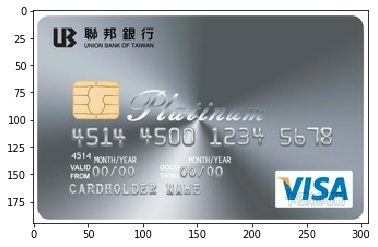

In [12]:
#img_data_32 = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
with tf.Session() as sess :
    img_data_32 = tf.image.convert_image_dtype(img_data, dtype=tf.uint8)
    print("type of pic:",img_data_32.dtype)
    print("type of pic:",img_data.dtype)
    encoded_image = tf.image.encode_jpeg(img_data)
    plt.imshow(img_data_32.eval())
    plt.show()


要先將原本的image-->uint8 轉成float才能再進行轉檔
method 0.1.3都可以

但method 2雙三次插值 會出現錯誤
 Floating point image RGB values must be in the 0..1 range.

method : 3 (150, 150, ?)


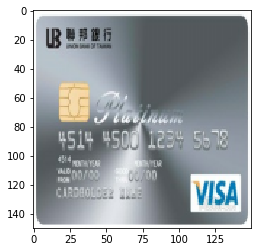

In [89]:
with tf.Session() as sess :
    img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
    
    resized = tf.image.resize_images(img_data, [150, 150], method=3)
    print ("method : 3"  ,resized.get_shape())
    plt.imshow(resized.eval())
    plt.show()



另外在訓練過程可能會需要不同角度、亮度來訓練

可用random來做調整

[[[ 1.          1.          1.        ]
  [ 0.99609375  0.99609375  0.99609375]
  [ 0.9921875   0.9921875   0.984375  ]
  ..., 
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 0.99609375  0.99609375  0.99609375]
  [ 0.9921875   0.9921875   0.9921875 ]
  [ 0.9921875   0.9921875   0.984375  ]
  ..., 
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 0.9921875   0.9921875   0.9921875 ]
  [ 0.9921875   0.9921875   0.9921875 ]
  [ 0.99609375  0.99609375  0.98828125]
  ..., 
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 ..., 
 [[ 1.          1.          1.        ]
  [ 1.          1.          0.9921875 ]
  [ 1.          1.          1.        ]
  ..., 
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.     

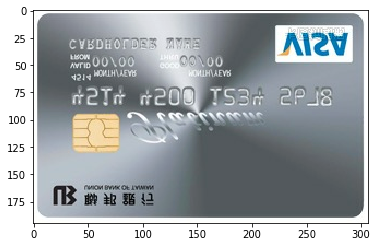

In [100]:
with tf.Session() as sess :
    
    img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
    print(img_data.eval())
    flipped = tf.image.random_flip_up_down(img_data)

    plt.imshow(flipped.eval())

    plt.show()

無法調整對比度(contrast)
一樣出現錯誤
Floating point image RGB values must be in the 0..1 range.

In [108]:
with tf.Session() as sess :
    adjusted = tf.image.per_image_standardization(img_data)
    plt.imshow(adjusted.eval())
    plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

預處理若是程序過多可能會減慢訓練過程，所以要做多執行緒輸入資料的處理框架